In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm
import cv2
from PIL import Image
from skimage import exposure
from skimage.transform import resize
import scipy
import time
from statistics import mean
import tensorflow as tf
import keras as ke
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [3]:
Tabela_treino = pd.read_csv('/kaggle/input/spr-x-ray-age/train_age.csv',sep = ',',engine = 'python')
display(Tabela_treino)

,imageId,age
0,0,89.0
1,1,72.0
2,2,25.0
3,3,68.0
4,4,37.0
...,...,...
10697,10697,79.0
10698,10698,67.0
10699,10699,66.0
10700,10700,78.0


In [4]:
nlin = np.shape(Tabela_treino)[0]   #numero de linhas da minha tabela do excel
hhh = []
tamy = []

for i in tqdm(range(0,nlin)):
    imageID = Tabela_treino['imageId'].iloc[i]      #pega o valor do imageID de cada linha 
    file_path = ("/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/"  + str(imageID).zfill(6) + ".png")
    img = cv2.imread(file_path) #aplica o numero do imageID pra buscar a imagem no diretório com o mesmo numero
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.merge((img,img,img))
    img = cv2.resize(img, (200,200), interpolation = cv2.INTER_AREA)
    img = np.array(img)/255
    hhh.append(img)
    tamy.append(Tabela_treino['age'].iloc[i])
tamy = np.array(tamy)

100%|██████████| 10702/10702 [10:18<00:00, 17.31it/s]


In [5]:
X_treino, X_val, Y_treino, Y_val = train_test_split(hhh, tamy, test_size=0.03, random_state=500,shuffle=True)

In [6]:
model_extract = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(200,200,3))
features_treino = model_extract.predict(np.array(X_treino))
features_val = model_extract.predict(np.array(X_val))

11/11 [==============================] - 88s 8s/step


In [7]:
X_treino.clear()
print(np.shape(features_treino))

(10380, 6, 6, 512)


In [24]:
# del features_treino
# del features_val

In [25]:
Tabela_teste = pd.read_csv('/kaggle/input/spr-x-ray-age/sample_submission_age.csv',sep = ',',engine = 'python')
display(Tabela_teste)

,imageId,age
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
11742,11742,0
11743,11743,0
11744,11744,0
11745,11745,0


In [28]:
nlin = np.shape(Tabela_teste)[0]   #numero de linhas da minha tabela do excel
X_teste = []
Y_teste = []

for i in tqdm(range(0,nlin)):
    imageID = Tabela_teste['imageId'].iloc[i]      #pega o valor do imageID de cada linha 
    file_path = ("/kaggle/input/spr-x-ray-age/kaggle/kaggle/test/"  + str(imageID).zfill(6) + ".png")
    img = cv2.imread(file_path) #aplica o numero do imageID pra buscar a imagem no diretório com o mesmo numero
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.merge((img,img,img))
    img = cv2.resize(img, (200,200), interpolation = cv2.INTER_AREA)
    img = np.array(img)/255
    X_teste.append(img)
    Y_teste.append(Tabela_teste['age'].iloc[i])
Y_teste = np.array(Y_teste)

100%|██████████| 11747/11747 [09:37<00:00, 20.32it/s]


In [ ]:
features_teste = model_extract.predict(np.array(X_teste))

In [11]:
# X_teste.clear()

In [13]:
modelo_melhorfold = ke.models.load_model("/kaggle/input/ModeloMelhorFold/model1_melhor_fold.h5")

history = modelo_melhorfold.fit(features_treino, Y_treino,batch_size=100, epochs=50, validation_data = (features_val, Y_val))

Epoch 1/50
104/104 [==============================] - 9s 76ms/step - loss: 90.6871 - mae: 7.3931 - val_loss: 80.3342 - val_mae: 7.0379
Epoch 2/50
104/104 [==============================] - 7s 67ms/step - loss: 91.1226 - mae: 7.4542 - val_loss: 68.5670 - val_mae: 6.2470
Epoch 3/50
104/104 [==============================] - 7s 67ms/step - loss: 94.9924 - mae: 7.6302 - val_loss: 66.9109 - val_mae: 6.1489
Epoch 4/50
104/104 [==============================] - 7s 67ms/step - loss: 85.5583 - mae: 7.2176 - val_loss: 66.2370 - val_mae: 6.1395
Epoch 5/50
104/104 [==============================] - 7s 68ms/step - loss: 85.1184 - mae: 7.2217 - val_loss: 72.6795 - val_mae: 6.4982
Epoch 6/50
104/104 [==============================] - 7s 71ms/step - loss: 82.8723 - mae: 7.1252 - val_loss: 73.4330 - val_mae: 6.3016
Epoch 7/50
104/104 [==============================] - 7s 68ms/step - loss: 79.8609 - mae: 7.0030 - val_loss: 66.6119 - val_mae: 6.1005
Epoch 8/50
104/104 [==============================] - 7

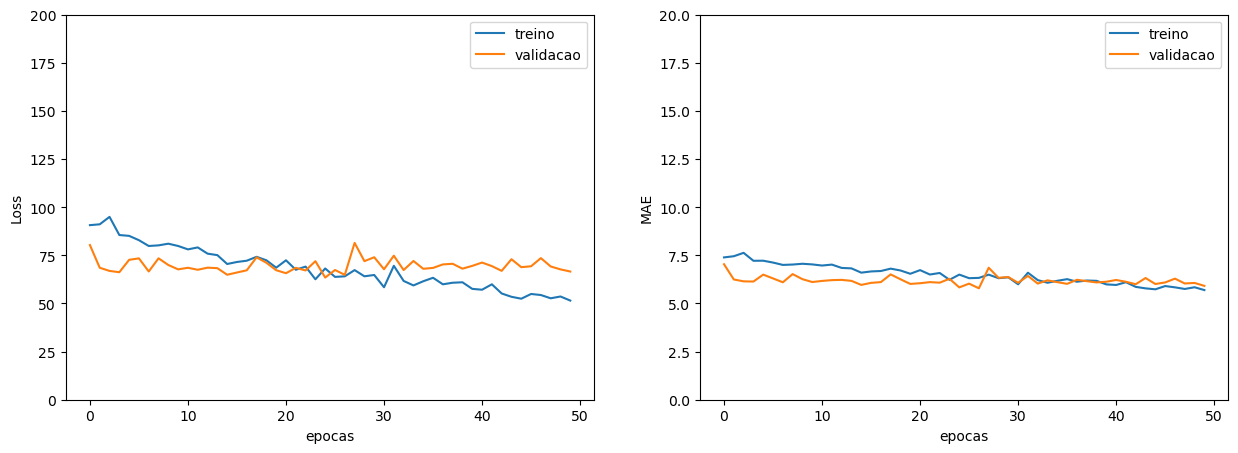

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")
plt.ylim(bottom = 0, top=200)

plt.legend();
plt.subplot(1,2,2)
plt.plot(history.history["mae"], label="treino")
plt.plot(history.history["val_mae"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("MAE")
plt.ylim(bottom = 0, top=20)
plt.legend();

In [15]:
Ypred_treino=modelo_melhorfold.predict(np.array(features_treino))
Ypred_val=modelo_melhorfold.predict(np.array(features_val))

11/11 [==============================] - 0s 15ms/step


In [16]:
from sklearn.metrics import mean_absolute_error
from statistics import mean 

print('MAE treino = ', mean_absolute_error(Ypred_treino, Y_treino))
print('MAE teste = ', mean_absolute_error(Ypred_val, Y_val))

MAE treino =  3.5425025023017547
MAE teste =  5.914381160499146


In [20]:
#salvar o modelo retreinado
modelo_melhorfold.save('modelo_retreinado.h5')

MAE =  3.5425025023017547


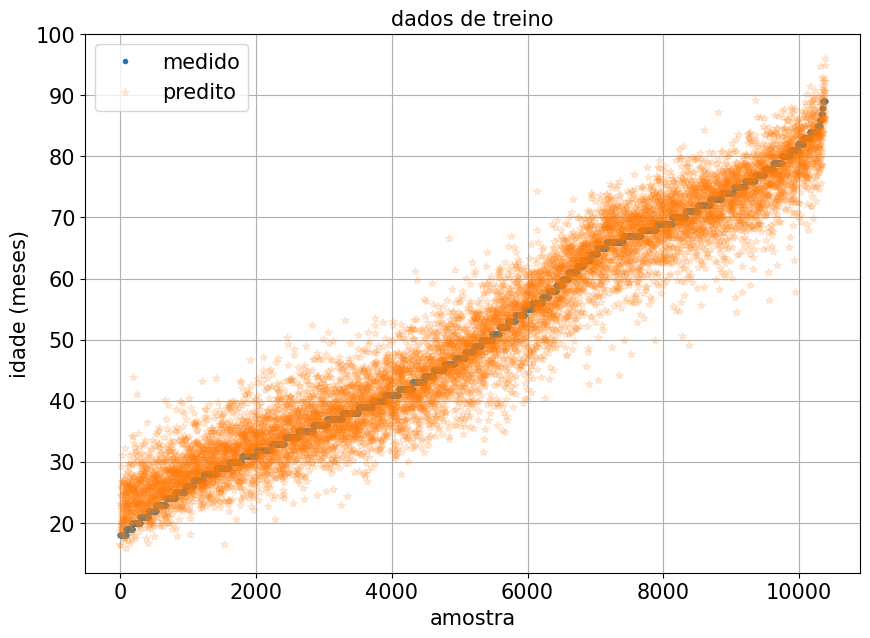

In [17]:
plt.figure(figsize=(10,7))
idx_t=np.argsort(Y_treino)
plt.plot(Y_treino[idx_t],'.')
plt.plot(Ypred_treino[idx_t],'*',alpha=0.15)
plt.legend(['medido','predito'],prop={'size': 15})
plt.title('dados de treino',size=15)
plt.xticks(fontsize=15);plt.xlabel('amostra',size=15)
plt.yticks(fontsize=15);plt.ylabel('idade (meses)',size=15);
plt.grid()
#plt.savefig('img2.png', bbox_inches='tight');
print("MAE = ", mean_absolute_error(Ypred_treino, Y_treino))

MAE =  5.914381160499146


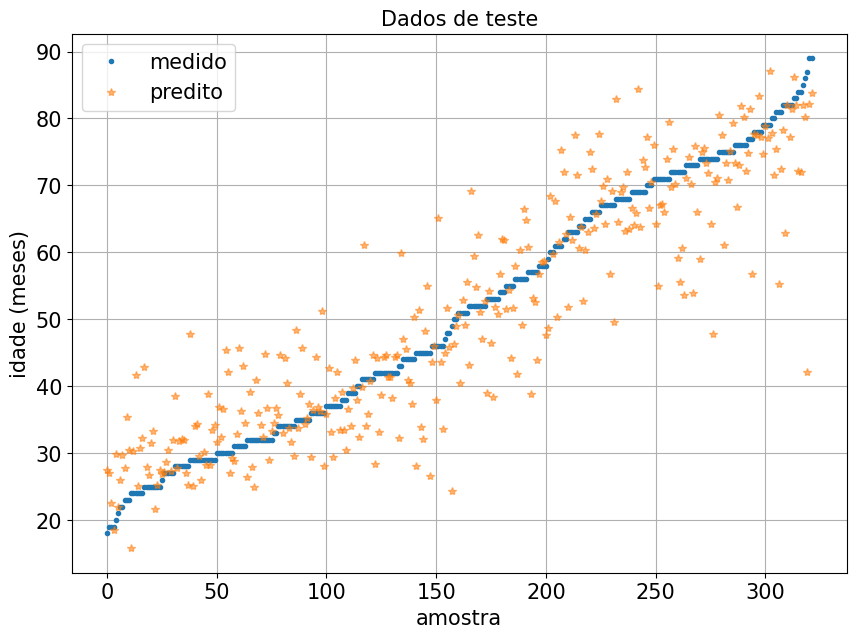

In [18]:
plt.figure(figsize=(10,7))
idx_t=np.argsort(Y_val)
plt.plot(Y_val[idx_t],'.')
plt.plot(Ypred_val[idx_t],'*',alpha=0.55)
plt.legend(['medido','predito'],prop={'size': 15})
plt.title('Dados de teste',size=15)
plt.xticks(fontsize=15);plt.xlabel('amostra',size=15)
plt.yticks(fontsize=15);plt.ylabel('idade (meses)',size=15);
plt.grid()
#plt.savefig('img3.png', bbox_inches='tight');

print("MAE = ", mean_absolute_error(Ypred_val,Y_val))

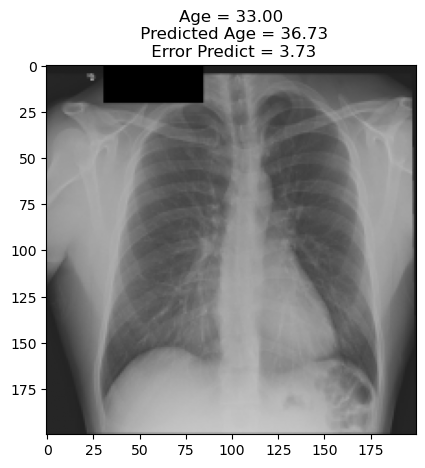

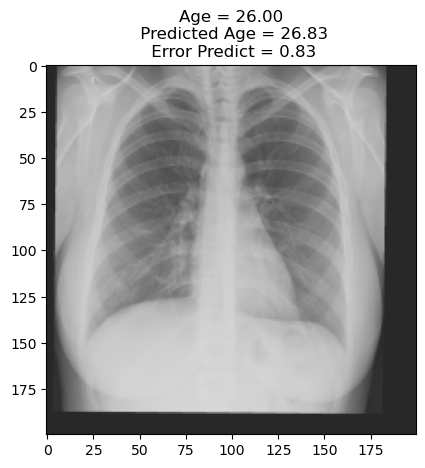

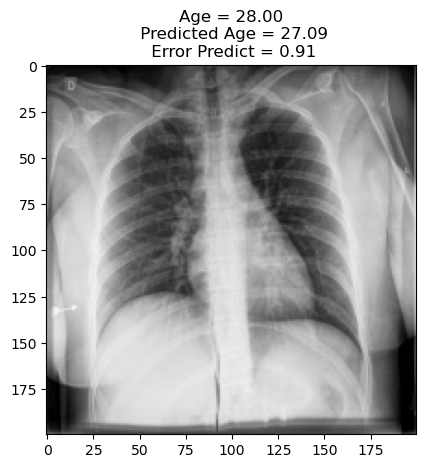

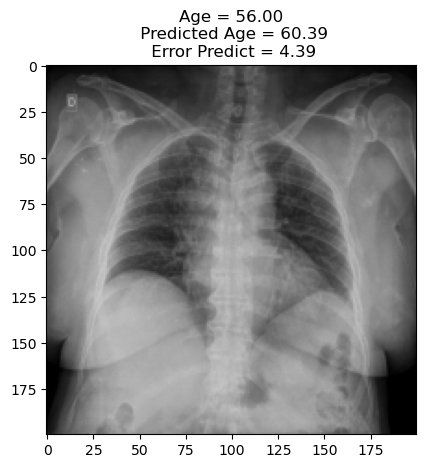

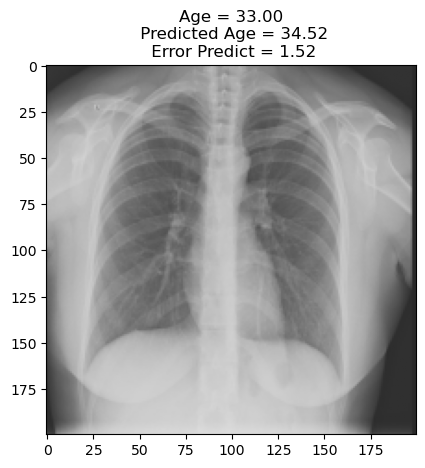

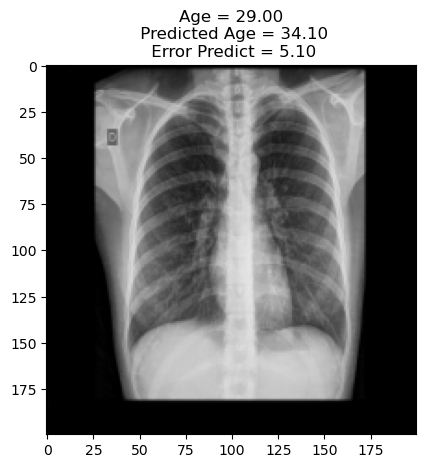

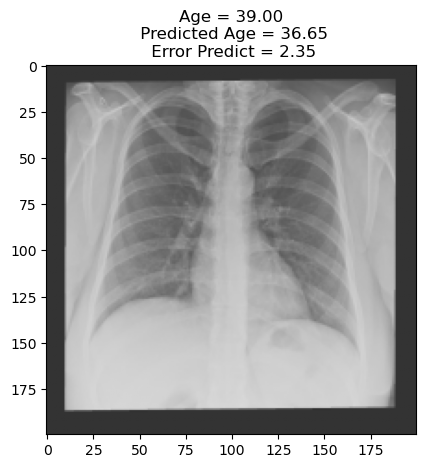

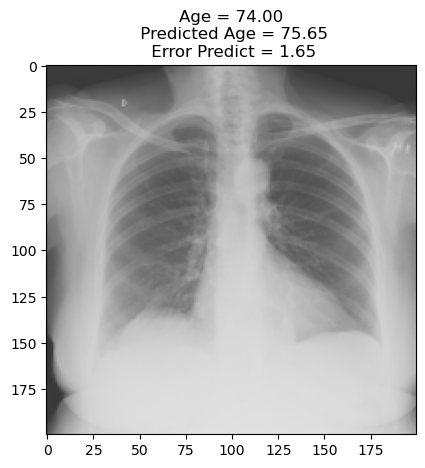

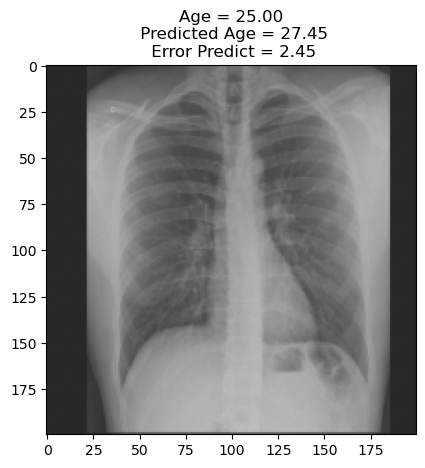

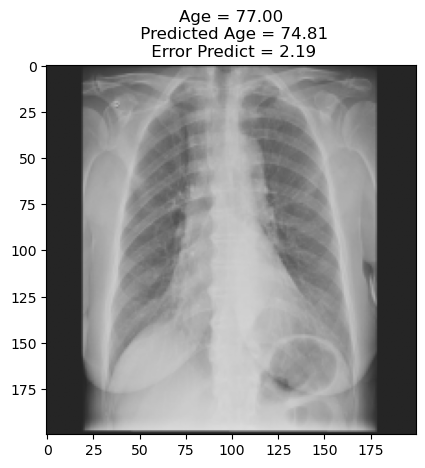

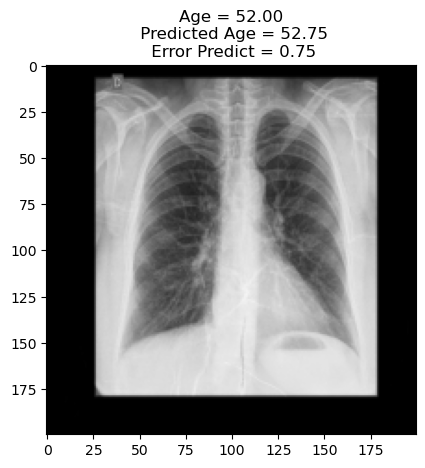

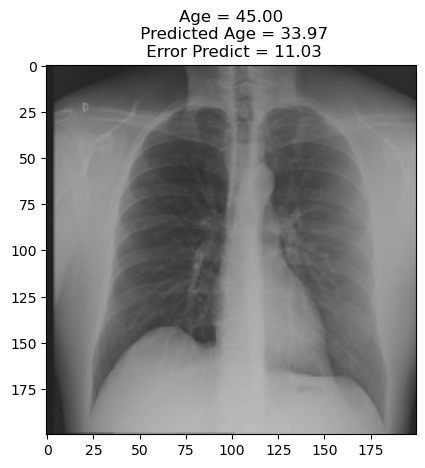

In [19]:
for i in range(0,12):
    Age = Y_val[i]
    PredictedAge = Ypred_val[i]
    error_pred = abs(Age - PredictedAge)
    plt.figure();
    plt.imshow(X_val[i]);plt.title("Age = %.2f" %Age +
                "\n Predicted Age = %.2f" %PredictedAge+
                "\n Error Predict = %.2f" %error_pred )

In [ ]:
# Ypred_teste=modelo_melhorfold.predict(np.array(features_teste))

In [ ]:
# Tabela_teste_final = Tabela_teste.copy()
# Tabela_teste_final['age'] = Ypred_teste

# display(Tabela_teste_final)

In [ ]:
# Tabela_teste_final.to_csv("submission_rafael.csv", index=False)